In [1]:
# -- necessary setup

import os,sys
sys.path.append(os.path.abspath('../src'))

from IO.RNA_IO import RNA_IO
from utils import parse_pdb_files
from Transformations.transformers.SecondaryStructure import SecondaryStructure

RF00162


In [2]:
X, Y= parse_pdb_files(['7eaf'])

(1, 94, 44, 3)
max_residues: 94, max_atoms: 44


In [3]:
ss1 = SecondaryStructure()
X1, Y1= ss1.transform(X, Y)
print(X1.shape)
print(Y1["Original"].shape)
print("".join(Y1["SecondaryStructure"][0]))

(1, 94)
(1, 94, 44, 3)
((((()..(((.(.(((((.((((()(()()(.)(.).))((((..((.).......()).()(.(.)(.)(.(...)..(.)...)(.)()).


In [4]:
ss2 = SecondaryStructure(nussinov=True)
X2, Y2= ss2.transform(X1, Y1)
print(X2.shape)
print(Y2["Original"].shape)
print("".join(Y2["SecondaryStructure"][0]))
s="".join(Y2["SecondaryStructure"][0])

(1, 94)
(1, 94, 44, 3)
..(((()(..)).))..().(((.)((())())((.)(((())(..((.)..()))(()(.((((((())()))))(()))))..)()).))).


rna_network.html


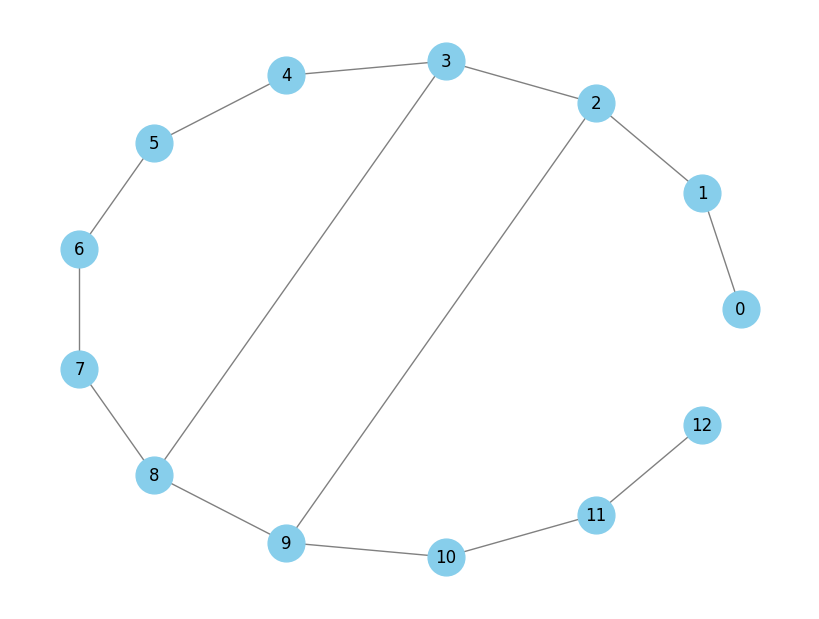

rna_network.html


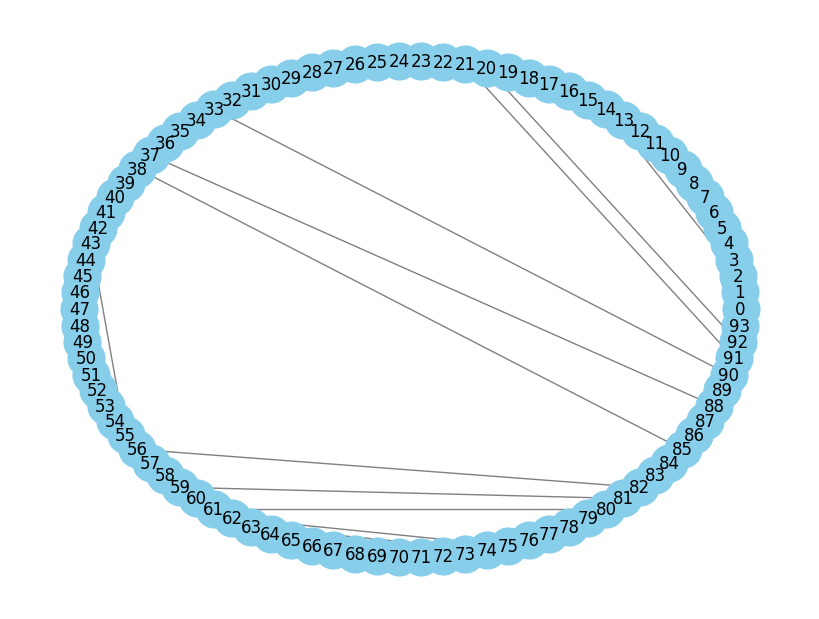

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network

def plot_rna_network(dot_bracket, filename="rna_network.html"):
    G = nx.Graph()
    net = Network(height="800px", width="100%", notebook=True)
    stack = []
    base_pairs = []

    for i, char in enumerate(dot_bracket):
        if char == "(":
            stack.append(i)
        elif char == ")":
            start = stack.pop()
            end = i
            base_pairs.append((start, end))
    
    for i in range(len(dot_bracket)):
        G.add_node(i)
        net.add_node(i, label=str(i + 1))
    
    for i in range(len(dot_bracket) - 1):  # Link sequential bases
        G.add_edge(i, i + 1)
        net.add_edge(i, i + 1, color="black")
    
    for pair in base_pairs:  # Link base pairs
        G.add_edge(pair[0], pair[1])
        net.add_edge(pair[0], pair[1], color="red")
    
    net.force_atlas_2based()
    net.show(filename)

    plt.figure(figsize=(8, 6))
    pos = nx.circular_layout(G)  # Circular layout for better RNA visualization
    nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", edge_color="gray")
    plt.show()

dot_bracket = "..((....))..."
plot_rna_network(dot_bracket)
plot_rna_network("".join(Y1["SecondaryStructure"][0]))


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Full structure for Sequence 10: (((...))..


/tmp/ipykernel_125657/103576709.py:59: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  ax.plot(x, y, 'ko', markersize=1, color='darkblue')  # RNA residue positions


Full structure for Sequence 10: (((...))..


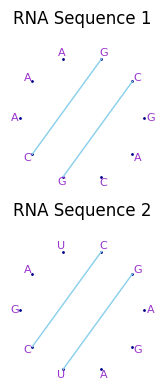

Full structure for Sequence 94: ..(((()(..)).))..().(((.)((())())((.)(((())(..((.)..()))(()(.((((((())()))))(()))))..)()).))).


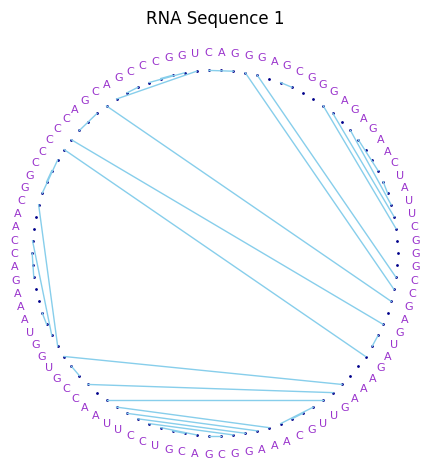

Full structure for Sequence 94: ..(((()(..)).))..().(((.)((())())((.)(((())(..((.)..()))(()(.((((((())()))))(()))))..)()).))).


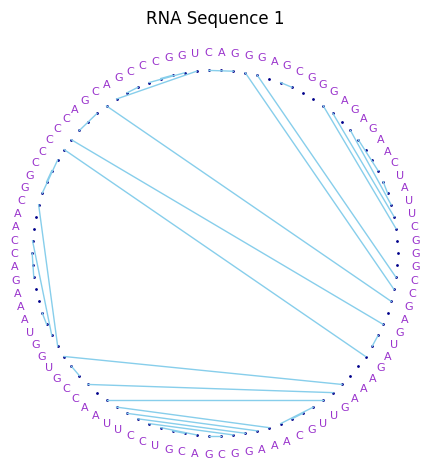

In [ ]:
%pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np

def visualize_rna_ss(sequences, dot_brackets):
    """
    Visualizes RNA sequences and their secondary structure with base pair arcs.
    
    Parameters:
    - sequences: NumPy array of RNA sequences (shape: num_sequences, max_residues), padded with empty strings.
    - dot_brackets: NumPy array of lists containing dot-bracket strings (shape: num_sequences, max_residues).
    
    Returns:
    - Displays the RNA structure as a plot. 
    """
    num_sequences = sequences.shape[0]
    
    # Ensure axes is iterable (for single sequence case)
    if num_sequences == 1:
        axes = [plt.gca()]
    else:
        fig, axes = plt.subplots(num_sequences, 1, figsize=(10, 2 * num_sequences))
    
    # Iterate through each sequence and its corresponding dot-bracket
    for idx in range(num_sequences):
        seq = sequences[idx]
        dot_bracket = dot_brackets[idx]
        ax = axes[idx]
        
        ax.set_title(f"RNA Sequence {idx + 1}\n")

        # Remove padding (empty strings)
        valid_indices = np.where(seq != "")[0]
        valid_seq = [seq[i] for i in valid_indices]
        valid_dot_bracket = [dot_bracket[i] for i in valid_indices]

        # Convert dot-bracket to coordinates
        positions = np.arange(len(valid_seq))
        base_pairs = []

        # Find base pairs from dot-bracket using stack
        stack = []
        for i, char in enumerate(valid_dot_bracket):
            if char == '(':
                stack.append(i)
            elif char == ')':
                pair = stack.pop()
                base_pairs.append((pair, i))

        # Create a circular plot for the RNA sequence
        num_residues = len(valid_seq)
        angle_step = 2 * np.pi / num_residues
        angles = np.arange(0, 2 * np.pi, angle_step)

        # Plot the sequence as dots in a circle
        for i, angle in enumerate(angles):
            x = np.cos(angle)
            y = np.sin(angle)
            ax.plot(x, y, 'ko', markersize=1, color='darkblue')  # RNA residue positions
            ax.text(x * 1.1, y * 1.1, valid_seq[i], ha='center', va='center', fontsize=8, color='darkorchid')
        
        # Draw arcs for base pairs
        for start, end in base_pairs:
            start_angle = angles[start]
            end_angle = angles[end]
            ax.plot([np.cos(start_angle), np.cos(end_angle)], 
                    [np.sin(start_angle), np.sin(end_angle)], 
                    color='skyblue', lw=1)

        ax.set_aspect('equal', 'box')
        ax.axis('off')  # Turn off the axis for clarity
        
        # Handle padding and show the full dot-bracket structure
        full_structure = ['' if seq[i] == '' else '.' for i in range(len(seq))]
        for i, idx in enumerate(valid_indices):
            full_structure[idx] = valid_dot_bracket[i]
        
        # Print the full dot-bracket sequence, keeping empty residues as ''
        print(f"Full structure for Sequence {idx + 1}: {''.join(full_structure)}")

    plt.tight_layout()
    plt.show()

# Example usage:
sequences = np.array([
    ["G", "C", "G", "A", "A", "A", "C", "G", "C", "A", ""],  # Sequence 1 with padding
    ["A", "G", "C", "U", "A", "G", "C", "U", "A", "G", ""]   # Sequence 2 with padding
])

dot_brackets = np.array([
    ['(', '(', '(', '.', '.', '.', ')', ')', '.', '.', ''],  # Dot-bracket for Sequence 1
    ['(', '(', '(', '.', '.', '.', ')', ')', '.', '.', '']   # Dot-bracket for Sequence 2
])

visualize_rna_ss(sequences, dot_brackets)
visualize_rna_ss(X1, Y1["SecondaryStructure"])
visualize_rna_ss(X2, Y2["SecondaryStructure"])

rna_network_1.html


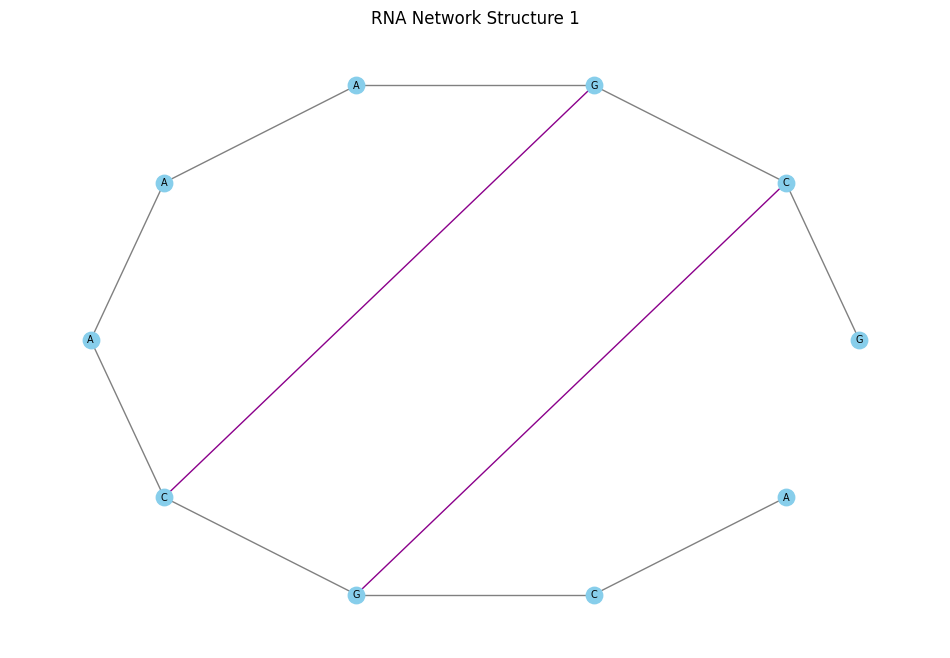

rna_network_2.html


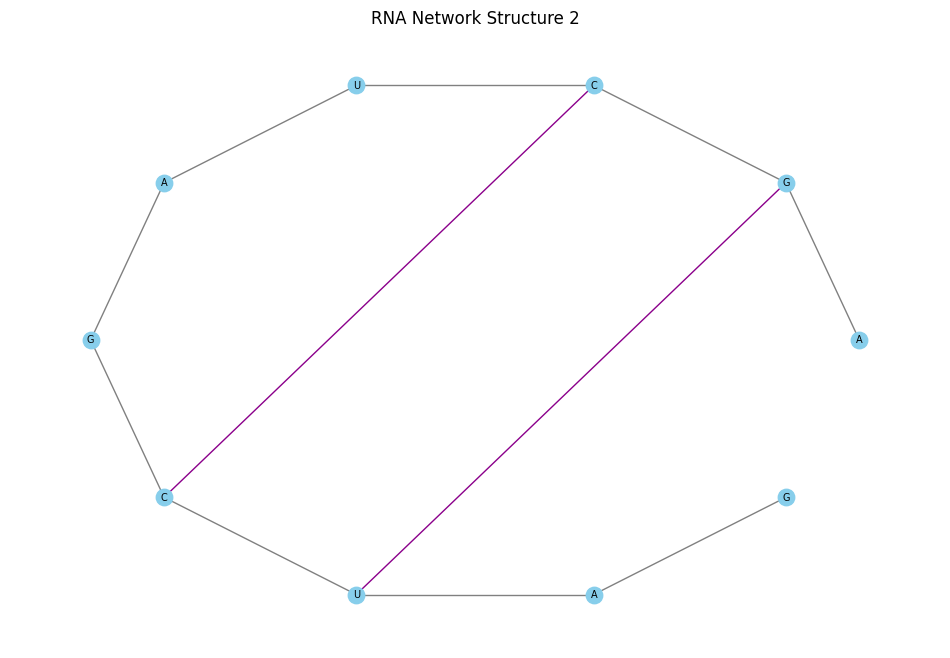

rna_network_X1_1.html


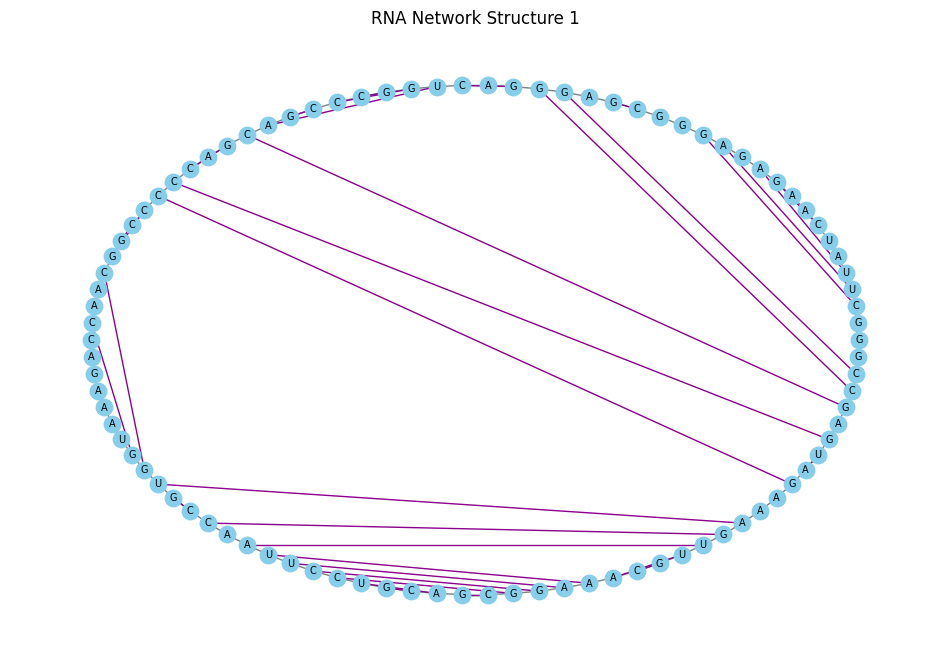

rna_network_X2_1.html


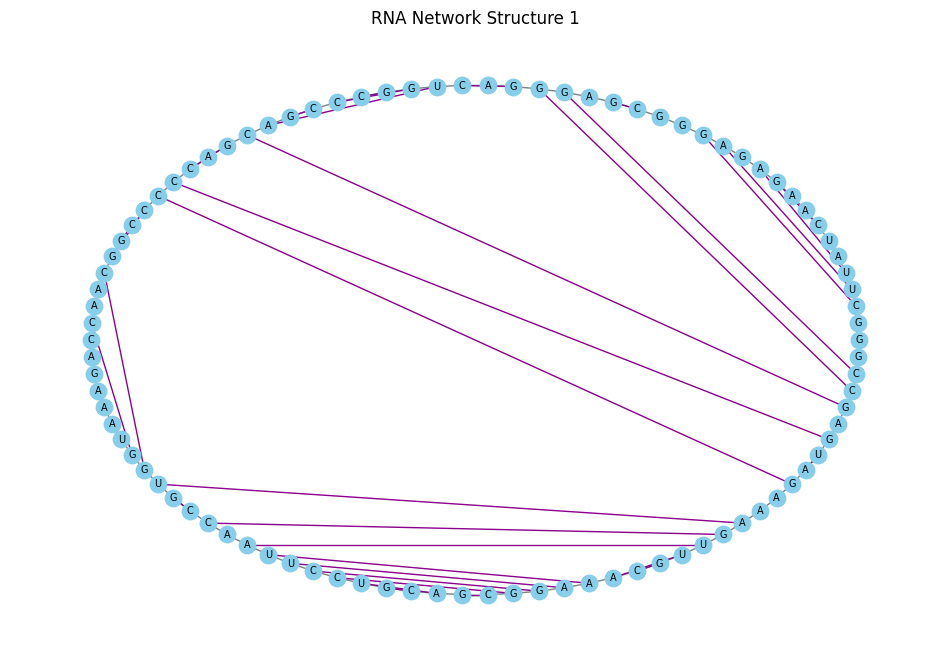

In [22]:
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
import numpy as np

def plot_rna_network(sequences, dot_brackets, filename_prefix="rna_network"):
    """
    Plots RNA sequences as network graphs based on dot-bracket notation.
    
    Parameters:
    - sequences: NumPy array of RNA sequences (shape: num_sequences, max_residues), padded with empty strings.
    - dot_brackets: NumPy array of lists containing dot-bracket strings (shape: num_sequences, max_residues).
    - filename_prefix: Prefix for output HTML files (default: "rna_network").
    
    Displays network plots for RNA secondary structures.
    """
    num_sequences = sequences.shape[0]
    
    for idx in range(num_sequences):
        seq = sequences[idx]
        dot_bracket = dot_brackets[idx]
        
        # Remove padding
        valid_indices = np.where(seq != "")[0]
        valid_seq = [seq[i] for i in valid_indices]
        valid_dot_bracket = [dot_bracket[i] for i in valid_indices]
        
        G = nx.Graph()
        net = Network(height="800px", width="100%", notebook=True)
        stack = []
        base_pairs = []
        
        for i, char in enumerate(valid_dot_bracket):
            if char == "(":
                stack.append(i)
            elif char == ")":
                start = stack.pop()
                end = i
                base_pairs.append((start, end))
        
        for i in range(len(valid_dot_bracket)):
            G.add_node(i, label=valid_seq[i])
            net.add_node(i, label=valid_seq[i], size=10)
        
        for i in range(len(valid_dot_bracket) - 1):  # Link sequential bases
            G.add_edge(i, i + 1)
            net.add_edge(i, i + 1, color="gray")
        
        for pair in base_pairs:  # Link base pairs
            G.add_edge(pair[0], pair[1])
            net.add_edge(pair[0], pair[1], color="red")
        
        net.force_atlas_2based()
        net.show(f"{filename_prefix}_{idx+1}.html")
        
        plt.figure(figsize=(12, 8))
        pos = nx.circular_layout(G)  # Ensure circular layout
        labels = {i: valid_seq[i] for i in range(len(valid_seq))}
        
        # Draw edges with different colors
        nx.draw_networkx_edges(G, pos, edgelist=[(i, i + 1) for i in range(len(valid_dot_bracket) - 1)], edge_color="gray", width=1)
        nx.draw_networkx_edges(G, pos, edgelist=base_pairs, edge_color="darkmagenta", width=1)
        
        nx.draw_networkx_nodes(G, pos, node_size=140, node_color="skyblue")
        nx.draw_networkx_labels(G, pos, labels=labels, font_size=7)
        
        plt.title(f"RNA Network Structure {idx + 1}")
        plt.axis("off")
        plt.show()

# Example usage:
sequences = np.array([
    ["G", "C", "G", "A", "A", "A", "C", "G", "C", "A", ""],  # Sequence 1 with padding
    ["A", "G", "C", "U", "A", "G", "C", "U", "A", "G", ""]   # Sequence 2 with padding
])

dot_brackets = np.array([
    ['(', '(', '(', '.', '.', '.', ')', ')', '.', '.', ''],  # Dot-bracket for Sequence 1
    ['(', '(', '(', '.', '.', '.', ')', ')', '.', '.', '']   # Dot-bracket for Sequence 2
])

plot_rna_network(sequences, dot_brackets)

plot_rna_network(X1, Y1["SecondaryStructure"], filename_prefix="rna_network_X1")
plot_rna_network(X2, Y2["SecondaryStructure"], filename_prefix="rna_network_X2")
